# Example training notebook file

In [1]:
# add work directory
import os
import sys
import torch

# you should add root directory
sys.path.append(os.path.dirname("../"))
print(torch.__version__)

1.1.0


In [2]:
!pip install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp36-cp36m-linux_x86_64.whl
!pip install https://download.pytorch.org/whl/cu100/torchvision-0.3.0-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 2.6MB 7.3MB/s 
  Found existing installation: torchvision 0.4.1+cu100
    Uninstalling torchvision-0.4.1+cu100:
      Successfully uninstalled torchvision-0.4.1+cu100


# Repository Init

In [5]:
# clone repo
!rm -rf repo
!git clone https://github.com/puilp0502/pytorch-hair-segmentation repo
!mv repo/* ..

Cloning into 'repo'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 413 (delta 4), reused 5 (delta 2), pack-reused 400
Receiving objects: 100% (413/413), 45.84 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (219/219), done.
mv: cannot move 'repo/assets' to '../assets': Directory not empty
mv: cannot move 'repo/data' to '../data': Directory not empty
mv: cannot move 'repo/docker' to '../docker': Directory not empty
mv: cannot move 'repo/markdowns' to '../markdowns': Directory not empty
mv: cannot move 'repo/models' to '../models': Directory not empty
mv: cannot move 'repo/networks' to '../networks': Directory not empty
mv: cannot move 'repo/notebooks' to '../notebooks': Directory not empty
mv: cannot move 'repo/utils' to '../utils': Directory not empty


In [2]:
# download data
!sh ../data/figaro.sh
!mv Figaro1k ../data/

navigating to ./data/ ...
../data/figaro.sh: 6: cd: can't cd to ./data/
Now downloading Figaro1k.zip ...
--2019-11-02 22:46:05--  https://www.dropbox.com/s/35momrh68zuhkei/Figaro1k.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
접속 www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... 접속됨.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/35momrh68zuhkei/Figaro1k.zip [following]
--2019-11-02 22:46:06--  https://www.dropbox.com/s/raw/35momrh68zuhkei/Figaro1k.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0dd4c9a0f8bf6e95ae35da9c83.dl.dropboxusercontent.com/cd/0/inline/ArlDzsqVW97EEaVebQBuk1OCsIYz2_a9OeKRIKspBjvmglYIanAJXx1RleOZFQZmdJETsGLHGZd_AmgdQ5wL3rD2lfz9E9hF94c--pw_WceBqw/file# [following]
--2019-11-02 22:46:06--  https://uc0dd4c9a0f8bf6e95ae35da9c83.dl.dropboxusercontent.com/cd/0/inline/ArlDzsqVW97EEaVebQBuk1OCsIYz2_a9OeKRIKspBjvm

  inflating: Figaro1k/GT/Training/Frame00623-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00494-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00598-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00652-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00103-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00752-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00003-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00847-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00947-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00824-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00924-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00486-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00160-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00586-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00731-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00859-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00959-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00332-gt.pbm  
  inflating: Figaro1k/GT/Tra

  inflating: Figaro1k/GT/Training/Frame01048-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00402-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00502-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame01035-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00253-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00461-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00330-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00561-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00230-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00087-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00318-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00449-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00218-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00549-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00896-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00996-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00434-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00683-gt.pbm  
  inflating: Figaro1k/GT/Tra

  inflating: Figaro1k/GT/Training/Frame01043-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00225-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00509-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00258-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00229-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00578-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00329-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00478-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00254-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame01032-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00505-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00354-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00405-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00237-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00566-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00080-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00337-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00466-gt.pbm  
  inflating: Figaro1k/GT/Tra

  inflating: Figaro1k/GT/Training/Frame00985-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00690-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00427-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00376-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00790-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00527-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00276-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame01038-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00194-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00323-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00472-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00094-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00223-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame01045-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00572-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00340-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00411-gt.pbm  
  inflating: Figaro1k/GT/Training/Frame00240-gt.pbm  
  inflating: Figaro1k/GT/Tra

  inflating: Figaro1k/GT/Testing/Frame00216-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00998-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00559-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00459-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00308-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00524-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame01013-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00367-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00681-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00267-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00164-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00064-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00744-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00115-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00168-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00832-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00627-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00967-gt.pbm  
  inflating: Figaro1k/GT/Testing/Frame00772-gt

  inflating: Figaro1k/Original/Training/Frame00439-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00541-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00429-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00304-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00480-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00490-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00952-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00942-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00784-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00848-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00930-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00920-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00376-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00366-org.jpg  
  inflating: Figaro1k/Original/Training/Frame01029-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00533-org.jpg  
  inflating: Figaro1k/Or

  inflating: Figaro1k/Original/Training/Frame00530-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00448-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00589-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00787-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00797-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00933-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00923-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00951-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00829-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00941-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00839-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00493-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00542-org.jpg  
  inflating: Figaro1k/Original/Training/Frame01048-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00552-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00317-org.jpg  
  inflating: Figaro1k/Or

  inflating: Figaro1k/Original/Training/Frame00688-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00698-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00885-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00074-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00895-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00749-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00621-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00759-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00557-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00547-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00302-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00312-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00080-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00919-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00861-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00909-org.jpg  
  inflating: Figaro1k/Or

  inflating: Figaro1k/Original/Training/Frame00676-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00023-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00033-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00913-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00284-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00294-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00180-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00961-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00190-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00809-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00139-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00041-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00051-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00614-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00604-org.jpg  
  inflating: Figaro1k/Original/Training/Frame00572-org.jpg  
  inflating: Figaro1k/Or

  inflating: Figaro1k/Original/Testing/Frame00827-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00319-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00742-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00912-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00285-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00469-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00032-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00605-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00050-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00128-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00138-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00563-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00960-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00596-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00798-org.jpg  
  inflating: Figaro1k/Original/Testing/Frame00164-org.jpg  
  inflating: Figaro1k/Original/Testing/F

## Loading Figaro dataset using get_loader

In [2]:
%load_ext autoreload
%autoreload 2
from PIL import Image
# importing dataloader

from data import get_loader
from torch.utils.data import DataLoader
# you have to predefine transforms to load dataset
# this transforms images and masks while loading
# example transforms

from utils import joint_transforms as jnt_trnsf
import torchvision.transforms as std_trnsf
from torch.utils.data.dataset import ConcatDataset


# transforms that are applied to both images and masks
# includes geometrical changes like flip
# implemented in ./utils/joint_transforms.py
joint_transforms = jnt_trnsf.Compose([
    jnt_trnsf.JointRandomAffine((-10, 10), shear=5, resample=Image.BICUBIC, fillcolor=0),
    jnt_trnsf.RandomResizedCrop(224, scale=(0.3, 0.5), ratio=(1, 1), interpolation=Image.BICUBIC),
    jnt_trnsf.RandomHorizontallyFlip()
])

celebhair_joint_transforms = jnt_trnsf.Compose([
    jnt_trnsf.RandomRotate(1),
    jnt_trnsf.RandomResizedCrop(224, scale=(0.85, 1), ratio=(1, 1), interpolation=Image.BICUBIC)
])


# transforms that are applied to only images
# this includes color jittering, normalizing, blurring, etc
# use torchvision.transforms, or implement additional transforms in 'utils'
train_image_transforms = std_trnsf.Compose([
    std_trnsf.ColorJitter(0.05, 0.05, 0.05, 0.05),
    std_trnsf.ToTensor()
    ])
celebhair_train_image_transforms = std_trnsf.Compose([
    std_trnsf.ToTensor()
    ])

test_image_transforms = std_trnsf.Compose([
    std_trnsf.ToTensor()
    ])

# transforms that are applied to only masks
mask_transforms = std_trnsf.Compose([
    std_trnsf.ToTensor()
    ])

# predifine other needed arguments
batch_size = 20
num_workers = 12
data_dir = '../data/Figaro1k/'
celebhair_dir = '../data/celeba-hair/'

In [3]:
train_loader = get_loader(dataset='figaro', return_dataset=False,
                          data_dir=data_dir,
                          train=True,
                          joint_transforms=joint_transforms,
                          image_transforms=train_image_transforms,
                          mask_transforms=mask_transforms,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=num_workers)

celebhair_loader = get_loader(dataset='celebhair', return_dataset=True,
                          data_dir=celebhair_dir,
                          train=True,
                          joint_transforms=celebhair_joint_transforms,
                          image_transforms=celebhair_train_image_transforms,
                          mask_transforms=mask_transforms,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=num_workers)

# train_dset = ConcatDataset([
#     figaro_loader,
#     celebhair_loader
# ])
# train_loader = DataLoader(train_dset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

test_loader = get_loader(dataset='figaro', return_dataset=False,
                         data_dir=data_dir,
                         train=False,
                         joint_transforms=joint_transforms,
                         image_transforms=test_image_transforms,
                         mask_transforms=mask_transforms,
                         batch_size=1,
                         shuffle=False,
                         num_workers=num_workers)
celebhair_test_loader = get_loader(dataset='celebhair', return_dataset=True,
                          data_dir=celebhair_dir,
                          train=False,
                          val=True,
                          joint_transforms=celebhair_joint_transforms,
                          image_transforms=test_image_transforms,
                          mask_transforms=mask_transforms,
                          batch_size=1,
                          shuffle=False,
                          num_workers=num_workers)

# test_dset = ConcatDataset([
#     figaro_test_loader,
#     celebhair_test_loader
# ])
# test_loader = DataLoader(test_dset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

840
3471
213
33


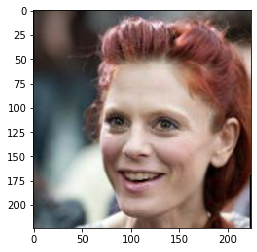

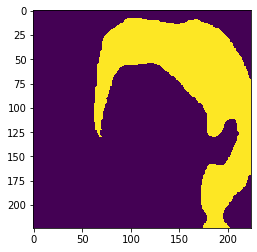

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
img_tensor = celebhair_loader[0]
plt.imshow(img_tensor[0].numpy().transpose(1, 2, 0))
plt.figure(1)
plt.imshow((img_tensor[1].numpy().transpose(1, 2, 0)).reshape(224, 224))

In [5]:
len(train_loader)

42

In [163]:
# two ways of iterating dataloader

# 1. using for loop

for step, (data, target) in enumerate(train_loader):
    break
step, data.size(), target.size() 


(0, torch.Size([20, 3, 224, 224]), torch.Size([20, 1, 224, 224]))

In [6]:
import matplotlib.pyplot as plt
# 2. using iterator
batch_iterator = iter(train_loader)

for _ in range(4):
    data, target = batch_iterator.next()
data.size(), target.size()

(torch.Size([20, 3, 224, 224]), torch.Size([20, 1, 224, 224]))

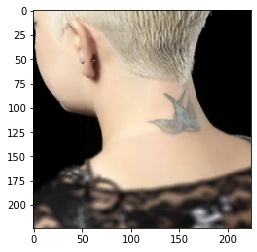

In [7]:
plt.imshow(data[1].numpy().transpose(1, 2, 0))


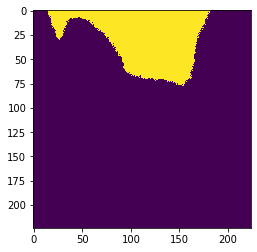

In [8]:
plt.imshow(target[1].numpy().transpose(1, 2, 0).reshape(224, 224))

## Importing model

In [103]:
# replace model location
!sed -i 's/http:\/\/data\.lip6\.fr\/cadene\/pretrainedmodels\/xception-b5690688\.pth/http:\/\/hakk.kr\/xception-b5690688.pth/' ../networks/deeplab_v3_plus.py 

In [167]:
import importlib
import networks.unet
importlib.reload(networks.unet)

AttributeError: module 'networks' has no attribute 'unet'

In [9]:
from networks import get_network

# you can add your own model in get_network fuction in ./networks/__init__.py 
network = 'unet'
# model = get_network(name=network)

# or just import directly
from networks.unet import UNet
model = UNet(n_channels=3, n_classes=1, bilinear=False)

## Defining Optimizer & Scheduler & loss & device

In [30]:
# torch.optim
lr = 0.00001
optimizer = torch.optim.Adam(model.parameters(), 
                             lr = lr, 
                             betas=(0.5, 0.999), # beta1 acts like 'momentum' in SGD
                            )

# torch.
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

# torch.nn
loss = torch.nn.BCEWithLogitsLoss()

# flag to use gpu or not
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Using Pytorch Ignite

In [13]:
!pip install pytorch-ignite


In [33]:
!curl https://raw.githubusercontent.com/puilp0502/pytorch-hair-segmentation/master/utils/metrics.py > ../utils/metrics.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2828  100  2828    0     0  14282      0 --:--:-- --:--:-- --:--:-- 14282


In [31]:
import importlib
import utils.metrics
importlib.reload(utils.metrics)

<module 'utils.metrics' from '../utils/metrics.py'>

In [32]:
# ignite moduels
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss

# custom modules
from utils.metrics import MultiThresholdMeasures, Accuracy, IoU, F1score

In [33]:
# trainer and evaluator
trainer = create_supervised_trainer(model, optimizer, loss, device=device)
measure = MultiThresholdMeasures()
evaluator = create_supervised_evaluator(model,
                                        metrics={
                                            '': measure,
                                            'pix-acc': Accuracy(measure),
                                            'iou': IoU(measure),
                                            'loss': Loss(loss),
                                            'f1': F1score(measure),
                                            },
                                        device=device)

In [35]:
# saving training state if you want
if 'clean' not in dir():
    clean = False
    from utils import update_state, save_ckpt_file
    state = update_state(model.state_dict(), 0, 0, 0, 0, 0)

In [27]:
# Load saved state
# DO NOT RUN WHILE TRAINING - IT WILL RESET MODEL'S STATE!
ckpt_file = './ckpt/unet_v2_adam_lr_0.0003_epoch_89.pth'
if ckpt_file:
    state = torch.load(ckpt_file)
    model.load_state_dict(state['weight'])

In [18]:
from visdom import Visdom
import numpy as np

class VisdomLinePlotter(object):
    """Plots to Visdom"""
    def __init__(self, env_name='main'):
        self.viz = Visdom()
        self.env = env_name
        self.plots = {}
    def plot(self, var_name, split_name, title_name, x, y):
        if var_name not in self.plots:
            self.plots[var_name] = self.viz.line(X=np.array([x,x]), Y=np.array([y,y]), env=self.env, opts=dict(
                legend=[split_name],
                title=title_name,
                xlabel='Epochs',
                ylabel=var_name
            ))
        else:
            self.viz.line(X=np.array([x]), Y=np.array([y]), env=self.env, win=self.plots[var_name], name=split_name, update = 'append')

In [36]:
visualize_visdom = True
if visualize_visdom:
    loss_plotter = VisdomLinePlotter(env_name='Training Example')
    iou_plotter = VisdomLinePlotter(env_name='Training Example')

Setting up a new session...
Setting up a new session...


In [37]:
ckpt_root = './ckpt_unet_v2x/'
filename = '{network}_v2x_adam_lr_{lr}_epoch_{epoch}.pth'
ckpt_path = os.path.join(ckpt_root, filename)

@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(trainer):
    num_iter = (trainer.state.iteration - 1) % len(train_loader) + 1
    if num_iter % 20 == 0:
        print("Epoch[{}] Iter[{:03d}] Loss: {:.2f}".format(
            trainer.state.epoch, num_iter, trainer.state.output))

@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    # evaluate on training set
    evaluator.run(train_loader)
    metrics = evaluator.state.metrics
    print("Training Results - Epoch: {} Avg-loss: {}\n Pix-acc: {}\n IoU: {}\n F1: {}\n".format(
        trainer.state.epoch, metrics['loss'], str(metrics['pix-acc']), str(metrics['iou']), str(metrics['f1'])))
    if visualize_visdom:
        loss_plotter.plot('loss', 'train', 'Loss', trainer.state.epoch, metrics['loss'])
        # iou_plotter.plot('iou', 'train', 'Mean IoU', trainer.state.epoch, metrics['iou'])

    # update state
    update_state(weight=model.state_dict(),
                  train_loss=metrics['loss'],
                  val_loss=state['val_loss'],
                  val_pix_acc=state['val_pix_acc'],
                  val_iou=state['val_iou'],
                  val_f1=state['val_f1'])

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    # evaluate test(validation) set
    evaluator.run(test_loader)
    metrics = evaluator.state.metrics
    print("Validation Results - Epoch: {} Avg-loss: {}\n Pix-acc: {}\n IoU: {}\n F1: {}\n".format(
        trainer.state.epoch, metrics['loss'], str(metrics['pix-acc']), str(metrics['iou']), str(metrics['f1'])))
    if visualize_visdom:
        loss_plotter.plot('loss', 'val', 'Loss', trainer.state.epoch, metrics['loss'])
        # iou_plotter.plot('iou', 'val', 'Mean IoU', trainer.state.epoch, metrics['iou'])

    # update scheduler
    scheduler.step(metrics['loss'])

    # update and save state
    update_state(weight=model.state_dict(),
                  train_loss=state['train_loss'],
                  val_loss=metrics['loss'],
                  val_pix_acc=metrics['pix-acc'],
                  val_iou=metrics['iou'],
                  val_f1=metrics['f1'])
    path = ckpt_path.format(network=network,
                            lr=lr,
                            epoch=trainer.state.epoch)
    print('Wrote checkpoint file to: %s' % path)
    save_ckpt_file(path, state)

In [38]:
trainer.run(train_loader, max_epochs=100)

Epoch[1] Iter[020] Loss: 0.10
Epoch[1] Iter[040] Loss: 0.09
Training Results - Epoch: 1 Avg-loss: 0.13163304612750099
 Pix-acc: [0.5, 0.919, 0.94, 0.947, 0.95, 0.951, 0.95, 0.945, 0.934, 0.905, 0.5]
 IoU: [0.5, 0.86, 0.891, 0.902, 0.906, 0.908, 0.903, 0.893, 0.871, 0.812, 0.0]
 F1: [0.667, 0.925, 0.942, 0.948, 0.951, 0.952, 0.949, 0.943, 0.931, 0.896, nan]

Validation Results - Epoch: 1 Avg-loss: 0.15604169753340769
 Pix-acc: [0.487, 0.904, 0.926, 0.934, 0.939, 0.942, 0.941, 0.938, 0.93, 0.905, 0.513]
 IoU: [0.487, 0.834, 0.865, 0.878, 0.884, 0.888, 0.885, 0.877, 0.86, 0.809, 0.0]
 F1: [0.655, 0.909, 0.928, 0.935, 0.939, 0.941, 0.939, 0.935, 0.925, 0.894, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_1.pth
Epoch[2] Iter[020] Loss: 0.10
Epoch[2] Iter[040] Loss: 0.10
Training Results - Epoch: 2 Avg-loss: 0.13297844908776738
 Pix-acc: [0.51, 0.917, 0.937, 0.945, 0.949, 0.95, 0.949, 0.944, 0.934, 0.905, 0.49]
 IoU: [0.51, 0.859, 0.889, 0.901, 0.906, 0.908, 0.

Epoch[12] Iter[020] Loss: 0.09
Epoch[12] Iter[040] Loss: 0.08
Training Results - Epoch: 12 Avg-loss: 0.13156369541372573
 Pix-acc: [0.506, 0.922, 0.94, 0.947, 0.95, 0.951, 0.948, 0.943, 0.932, 0.903, 0.494]
 IoU: [0.506, 0.865, 0.893, 0.902, 0.907, 0.907, 0.902, 0.891, 0.869, 0.81, 0.0]
 F1: [0.672, 0.928, 0.943, 0.949, 0.951, 0.951, 0.948, 0.942, 0.93, 0.895, nan]

Validation Results - Epoch: 12 Avg-loss: 0.1506134072327418
 Pix-acc: [0.503, 0.91, 0.929, 0.936, 0.94, 0.942, 0.941, 0.937, 0.928, 0.902, 0.497]
 IoU: [0.503, 0.847, 0.874, 0.885, 0.89, 0.892, 0.888, 0.879, 0.861, 0.807, 0.0]
 F1: [0.67, 0.917, 0.933, 0.939, 0.942, 0.943, 0.941, 0.936, 0.925, 0.893, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_12.pth
Epoch[13] Iter[020] Loss: 0.09
Epoch[13] Iter[040] Loss: 0.11
Training Results - Epoch: 13 Avg-loss: 0.13512237068443073
 Pix-acc: [0.503, 0.917, 0.937, 0.944, 0.947, 0.949, 0.947, 0.943, 0.934, 0.907, 0.497]
 IoU: [0.503, 0.857, 0.886, 0.897, 0

Epoch[23] Iter[020] Loss: 0.09
Epoch[23] Iter[040] Loss: 0.11
Training Results - Epoch: 23 Avg-loss: 0.12897234143955366
 Pix-acc: [0.506, 0.921, 0.94, 0.947, 0.95, 0.952, 0.95, 0.945, 0.935, 0.907, 0.494]
 IoU: [0.506, 0.864, 0.893, 0.903, 0.908, 0.91, 0.905, 0.895, 0.875, 0.819, 0.0]
 F1: [0.672, 0.927, 0.943, 0.949, 0.952, 0.953, 0.95, 0.945, 0.933, 0.901, nan]

Validation Results - Epoch: 23 Avg-loss: 0.14698428000397806
 Pix-acc: [0.498, 0.911, 0.93, 0.938, 0.942, 0.944, 0.943, 0.94, 0.93, 0.904, 0.502]
 IoU: [0.498, 0.846, 0.875, 0.886, 0.892, 0.894, 0.891, 0.883, 0.863, 0.811, 0.0]
 F1: [0.665, 0.917, 0.933, 0.939, 0.943, 0.944, 0.943, 0.938, 0.927, 0.895, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_23.pth
Epoch[24] Iter[020] Loss: 0.09
Epoch[24] Iter[040] Loss: 0.10
Training Results - Epoch: 24 Avg-loss: 0.13088538799257504
 Pix-acc: [0.504, 0.921, 0.94, 0.946, 0.949, 0.95, 0.948, 0.943, 0.933, 0.905, 0.496]
 IoU: [0.504, 0.863, 0.892, 0.902, 0.

Epoch[34] Iter[020] Loss: 0.10
Epoch[34] Iter[040] Loss: 0.10
Training Results - Epoch: 34 Avg-loss: 0.12786456312806832
 Pix-acc: [0.512, 0.921, 0.94, 0.948, 0.951, 0.952, 0.951, 0.946, 0.936, 0.909, 0.488]
 IoU: [0.512, 0.866, 0.894, 0.905, 0.91, 0.911, 0.908, 0.898, 0.878, 0.823, 0.0]
 F1: [0.677, 0.928, 0.944, 0.95, 0.953, 0.954, 0.952, 0.946, 0.935, 0.903, nan]

Validation Results - Epoch: 34 Avg-loss: 0.15949238283218634
 Pix-acc: [0.488, 0.904, 0.924, 0.932, 0.936, 0.939, 0.938, 0.935, 0.926, 0.902, 0.512]
 IoU: [0.488, 0.834, 0.863, 0.874, 0.88, 0.883, 0.88, 0.872, 0.853, 0.803, 0.0]
 F1: [0.656, 0.91, 0.926, 0.933, 0.936, 0.938, 0.936, 0.931, 0.921, 0.891, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_34.pth
Epoch[35] Iter[020] Loss: 0.09
Epoch[35] Iter[040] Loss: 0.11
Training Results - Epoch: 35 Avg-loss: 0.13124942637625195
 Pix-acc: [0.509, 0.92, 0.94, 0.946, 0.95, 0.951, 0.949, 0.944, 0.934, 0.907, 0.491]
 IoU: [0.509, 0.864, 0.892, 0.903, 0

Epoch[45] Iter[020] Loss: 0.12
Epoch[45] Iter[040] Loss: 0.10
Training Results - Epoch: 45 Avg-loss: 0.13100048057025387
 Pix-acc: [0.504, 0.92, 0.94, 0.946, 0.95, 0.951, 0.949, 0.944, 0.934, 0.905, 0.496]
 IoU: [0.504, 0.863, 0.892, 0.902, 0.907, 0.907, 0.902, 0.892, 0.871, 0.814, 0.0]
 F1: [0.67, 0.926, 0.943, 0.948, 0.951, 0.951, 0.949, 0.943, 0.931, 0.898, nan]

Validation Results - Epoch: 45 Avg-loss: 0.1568616908568312
 Pix-acc: [0.491, 0.908, 0.927, 0.934, 0.938, 0.941, 0.941, 0.937, 0.93, 0.904, 0.509]
 IoU: [0.491, 0.841, 0.868, 0.879, 0.884, 0.887, 0.885, 0.878, 0.861, 0.808, 0.0]
 F1: [0.659, 0.913, 0.93, 0.935, 0.938, 0.94, 0.939, 0.935, 0.925, 0.894, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_45.pth
Epoch[46] Iter[020] Loss: 0.11
Epoch[46] Iter[040] Loss: 0.08
Training Results - Epoch: 46 Avg-loss: 0.12897011619948207
 Pix-acc: [0.498, 0.923, 0.941, 0.948, 0.951, 0.952, 0.95, 0.945, 0.935, 0.907, 0.502]
 IoU: [0.498, 0.865, 0.893, 0.903, 0

Epoch[56] Iter[020] Loss: 0.10
Epoch[56] Iter[040] Loss: 0.09
Training Results - Epoch: 56 Avg-loss: 0.1311382090761548
 Pix-acc: [0.507, 0.921, 0.94, 0.947, 0.95, 0.951, 0.949, 0.944, 0.934, 0.905, 0.493]
 IoU: [0.507, 0.864, 0.893, 0.903, 0.907, 0.908, 0.904, 0.893, 0.872, 0.815, 0.0]
 F1: [0.672, 0.927, 0.943, 0.949, 0.951, 0.952, 0.949, 0.943, 0.931, 0.898, nan]

Validation Results - Epoch: 56 Avg-loss: 0.15941390981941436
 Pix-acc: [0.507, 0.908, 0.927, 0.934, 0.937, 0.938, 0.937, 0.933, 0.924, 0.899, 0.493]
 IoU: [0.507, 0.845, 0.872, 0.881, 0.885, 0.886, 0.883, 0.874, 0.855, 0.804, 0.0]
 F1: [0.673, 0.916, 0.931, 0.937, 0.939, 0.94, 0.938, 0.933, 0.922, 0.891, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_56.pth
Epoch[57] Iter[020] Loss: 0.11
Epoch[57] Iter[040] Loss: 0.10
Training Results - Epoch: 57 Avg-loss: 0.13106200702133633
 Pix-acc: [0.506, 0.92, 0.94, 0.947, 0.95, 0.951, 0.949, 0.944, 0.934, 0.904, 0.494]
 IoU: [0.506, 0.862, 0.892, 0.902,

Epoch[67] Iter[020] Loss: 0.10
Epoch[67] Iter[040] Loss: 0.10
Training Results - Epoch: 67 Avg-loss: 0.1345320170124372
 Pix-acc: [0.508, 0.919, 0.938, 0.945, 0.949, 0.95, 0.948, 0.943, 0.933, 0.906, 0.492]
 IoU: [0.508, 0.861, 0.89, 0.9, 0.906, 0.907, 0.902, 0.892, 0.872, 0.818, 0.0]
 F1: [0.674, 0.926, 0.942, 0.948, 0.95, 0.951, 0.949, 0.943, 0.932, 0.9, nan]

Validation Results - Epoch: 67 Avg-loss: 0.14872892031297438
 Pix-acc: [0.505, 0.911, 0.931, 0.938, 0.943, 0.945, 0.944, 0.94, 0.932, 0.907, 0.495]
 IoU: [0.505, 0.849, 0.877, 0.888, 0.894, 0.897, 0.894, 0.886, 0.868, 0.818, 0.0]
 F1: [0.671, 0.918, 0.935, 0.941, 0.944, 0.946, 0.944, 0.94, 0.929, 0.9, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_67.pth
Epoch[68] Iter[020] Loss: 0.08
Epoch[68] Iter[040] Loss: 0.11
Training Results - Epoch: 68 Avg-loss: 0.12823329653058732
 Pix-acc: [0.503, 0.921, 0.941, 0.948, 0.951, 0.952, 0.951, 0.946, 0.936, 0.909, 0.497]
 IoU: [0.503, 0.864, 0.894, 0.904, 0.90

Epoch[78] Iter[020] Loss: 0.10
Epoch[78] Iter[040] Loss: 0.11
Training Results - Epoch: 78 Avg-loss: 0.13248402997851372
 Pix-acc: [0.499, 0.92, 0.939, 0.946, 0.949, 0.951, 0.949, 0.944, 0.934, 0.906, 0.501]
 IoU: [0.499, 0.86, 0.889, 0.9, 0.905, 0.906, 0.902, 0.892, 0.871, 0.814, 0.0]
 F1: [0.665, 0.925, 0.941, 0.947, 0.95, 0.951, 0.948, 0.943, 0.931, 0.898, nan]

Validation Results - Epoch: 78 Avg-loss: 0.14205312137732484
 Pix-acc: [0.503, 0.915, 0.935, 0.942, 0.946, 0.949, 0.948, 0.944, 0.935, 0.908, 0.497]
 IoU: [0.503, 0.854, 0.884, 0.895, 0.901, 0.904, 0.901, 0.893, 0.874, 0.82, 0.0]
 F1: [0.669, 0.921, 0.938, 0.945, 0.948, 0.949, 0.948, 0.943, 0.933, 0.901, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_78.pth
Epoch[79] Iter[020] Loss: 0.10
Epoch[79] Iter[040] Loss: 0.09
Training Results - Epoch: 79 Avg-loss: 0.129374101935398
 Pix-acc: [0.508, 0.92, 0.939, 0.946, 0.95, 0.951, 0.95, 0.946, 0.936, 0.909, 0.492]
 IoU: [0.508, 0.862, 0.892, 0.903, 0.9

Epoch[89] Iter[020] Loss: 0.10
Epoch[89] Iter[040] Loss: 0.09
Training Results - Epoch: 89 Avg-loss: 0.13144194290396713
 Pix-acc: [0.503, 0.919, 0.938, 0.945, 0.949, 0.951, 0.949, 0.945, 0.935, 0.908, 0.497]
 IoU: [0.503, 0.861, 0.89, 0.9, 0.905, 0.907, 0.904, 0.894, 0.874, 0.82, 0.0]
 F1: [0.669, 0.925, 0.942, 0.947, 0.95, 0.951, 0.949, 0.944, 0.933, 0.901, nan]

Validation Results - Epoch: 89 Avg-loss: 0.1439824512866741
 Pix-acc: [0.497, 0.918, 0.936, 0.942, 0.945, 0.946, 0.945, 0.941, 0.932, 0.908, 0.503]
 IoU: [0.497, 0.858, 0.883, 0.893, 0.897, 0.898, 0.895, 0.886, 0.867, 0.818, 0.0]
 F1: [0.664, 0.923, 0.938, 0.943, 0.945, 0.946, 0.944, 0.939, 0.929, 0.9, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_89.pth
Epoch[90] Iter[020] Loss: 0.10
Epoch[90] Iter[040] Loss: 0.09
Training Results - Epoch: 90 Avg-loss: 0.13035908873592103
 Pix-acc: [0.512, 0.92, 0.94, 0.947, 0.95, 0.952, 0.95, 0.945, 0.934, 0.907, 0.488]
 IoU: [0.512, 0.865, 0.893, 0.904, 0.90

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fdccc398a90>>
Traceback (most recent call last):
  File "/home/frank/.virtualenvs/pytorch-hair-segmentation/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/home/frank/.virtualenvs/pytorch-hair-segmentation/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fdccc398a90>>
Traceback (most recent call last):
  File "/home/frank/.virtualenvs/pytorch-hair-segmentation/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 677, 

Training Results - Epoch: 99 Avg-loss: 0.12808917108036222
 Pix-acc: [0.502, 0.921, 0.941, 0.948, 0.951, 0.952, 0.951, 0.946, 0.935, 0.907, 0.498]
 IoU: [0.502, 0.863, 0.893, 0.904, 0.909, 0.91, 0.905, 0.895, 0.874, 0.816, 0.0]
 F1: [0.668, 0.926, 0.943, 0.95, 0.952, 0.953, 0.95, 0.945, 0.933, 0.899, nan]

Validation Results - Epoch: 99 Avg-loss: 0.1437977321113639
 Pix-acc: [0.505, 0.915, 0.933, 0.94, 0.944, 0.945, 0.944, 0.94, 0.93, 0.902, 0.495]
 IoU: [0.505, 0.855, 0.881, 0.891, 0.896, 0.898, 0.894, 0.885, 0.865, 0.808, 0.0]
 F1: [0.671, 0.922, 0.937, 0.942, 0.945, 0.946, 0.944, 0.939, 0.927, 0.894, nan]

Wrote checkpoint file to: ./ckpt_unet_v2x/unet_v2x_adam_lr_1e-05_epoch_99.pth
Epoch[100] Iter[020] Loss: 0.09
Epoch[100] Iter[040] Loss: 0.11
Training Results - Epoch: 100 Avg-loss: 0.13384997915653957
 Pix-acc: [0.51, 0.917, 0.937, 0.945, 0.948, 0.95, 0.949, 0.945, 0.935, 0.908, 0.49]
 IoU: [0.51, 0.859, 0.889, 0.9, 0.906, 0.908, 0.904, 0.895, 0.876, 0.822, 0.0]
 F1: [0.675, 0.92

In [ ]:
model.train()

In [105]:
model.eval()
batch_iterator = iter(test_loader)
x, y = batch_iterator.next()
print(x.shape)
print(x.max(), x.min())
eval_mask = model(x.to('cuda'))
eval_mask = eval_mask.cpu().detach()
eval_mask.shape

torch.Size([1, 3, 224, 224])
tensor(1.) tensor(0.)


torch.Size([1, 1, 224, 224])

torch.Size([1, 1, 224, 224])
torch.Size([1, 1, 224, 224])


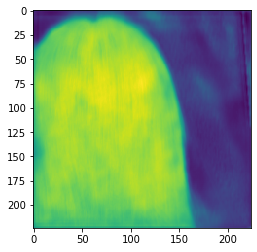

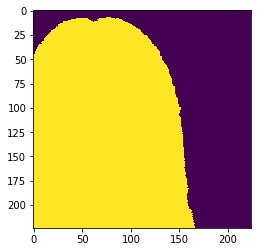

In [106]:

print(eval_mask.shape)
print(y.shape)
def to_greymap(tensor):
    tensor = tensor.cpu().detach()
    tensor = tensor[0].numpy().transpose(1, 2, 0)
    return tensor.reshape(tensor.shape[0], tensor.shape[1])
plt.figure(0)
plt.imshow(to_greymap(eval_mask))
plt.figure(1)
plt.imshow(to_greymap(y))


In [102]:
from PIL import Image
sample = Image.open('/home/frank/Projects/pytorch-hair-segmentation/data/Figaro1k/Original/Testing/Frame00030-org.jpg').resize((224, 224))
reshaped = np.array(sample).transpose(2, 0, 1)[np.newaxis, :, :, :]
sample_tensor = torch.from_numpy(reshaped).to('cuda', dtype=torch.float32) / 255
sample_tensor.size()

torch.Size([1, 3, 224, 224])

(array([23904.,  3580.,  1576.,   837.,   983.,  1521.,  3362.,  5529.,
         6821.,  2063.]),
 array([-4.7912145, -3.685514 , -2.5798135, -1.474113 , -0.3684125,
         0.737288 ,  1.8429885,  2.948689 ,  4.0543895,  5.16009  ,
         6.2657905], dtype=float32),
 <a list of 10 Patch objects>)

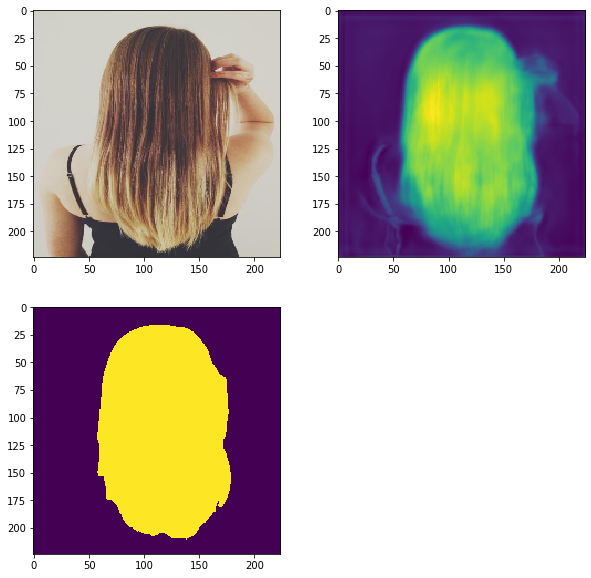

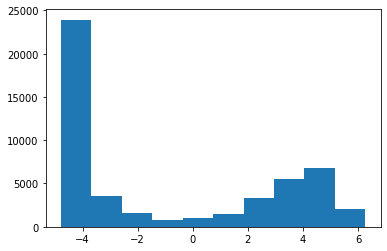

In [103]:
sample_mask = model(sample_tensor)
sample_mask_grey = to_greymap(sample_mask)
plt.figure(0, figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(sample)
plt.subplot(2, 2, 2)
plt.imshow(sample_mask_grey)
plt.subplot(2, 2, 3)
plt.imshow(sample_mask_grey > 1)
plt.figure(1)
plt.hist(sample_mask_grey.reshape(-1))

In [122]:
plotter.plot('loss', 'train', 'Class Loss', 1, 2.17)

In [ ]:
!tar cvzf ckpt.tar.gz ckpt/


In [52]:
!cat ckpt.tar.gz | nc hakk.kr 8888

## To do this in one-queue

```bash
# run this in root

python3 main.py \
  --networks segnet \
  --scheduler ReduceLROnPlateau \
  --batch_size 4 \
  --epochs 100 \
  --lr 1e-3 \
  --num_workers 4 \
  --optimizer adam \
  --momentum 0.5
```